In [24]:
import function as f
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [30]:
folder_path = 'Results'
y_col = ['C_max_prev', 'C_max_now', 'C_max', 'Congestion_ratio_AVG', 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now']

c_max_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[2])

c_max_df = f.to_numeric(c_max_df, y_col[0])
c_max_df = f.to_numeric(c_max_df, y_col[1])
c_max_df = f.to_numeric(c_max_df, y_col[3])
c_max_df = f.to_numeric(c_max_df, y_col[4])
c_max_df = f.to_numeric(c_max_df, y_col[5])

# for file_name, df in c_max_df:
#     print(df[df.columns].dtypes)

for file_name, df in c_max_df:
    # add column
    df['Number of YT'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
c_max_df

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  611                 5                5       80       10       10          56   
  612                 5                5       80       10       10          57   
  613                 5                5       80       10       10          58   
  614                 5                5       80       10       10          59   
  615                 5                5       80       10       10  

In [31]:
concat_df = pd.DataFrame()

for file_name, df in c_max_df:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # concat shortest_df and others_df and concat_df
    concat_df = pd.concat([concat_df, shortest_df, others_df], ignore_index=True)

concat_df

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,repeat_num,C_max_prev,C_max_now,C_max,Congestion_ratio_AVG,Congestion_ratio_AVG_prev,Congestion_ratio_AVG_now,Number of YT
0,5,5,0,0,100,1,404.816,396.952,404.816,0.036557,0.034676,0.038438,10
1,5,5,0,0,100,2,430.392,389.856,430.392,0.031613,0.046885,0.016342,10
2,5,5,0,0,100,3,395.136,403.208,403.208,0.047560,0.038560,0.056561,10
3,5,5,0,0,100,4,379.360,406.512,406.512,0.076458,0.058949,0.093967,10
4,5,5,0,0,100,5,367.512,419.168,419.168,0.023216,-0.013357,0.059789,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,30,30,10,80,10,56,435.648,448.792,448.792,0.236987,0.233097,0.240876,60
1625,30,30,10,80,10,57,434.880,469.536,469.536,0.309491,0.300153,0.318829,60
1626,30,30,10,80,10,58,447.840,439.096,447.840,0.334047,0.481566,0.186527,60
1627,30,30,10,80,10,59,441.248,436.480,441.248,0.273246,0.283173,0.263319,60


In [32]:
def lineplot_range_2(_df, _x_col, y_col, _y_lim, _figsize, _title, _legend_loc):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = _figsize)
    
    _shortest_df = _df[_df['alpha_1'] == 0]
    _others_df = _df[_df['alpha_1'] != 0]
    
    # Plot for _shortest_df
    axes[0].set_title('C_max of Shortest', fontsize= 12)
    axes[1].set_title('C_max of LP', fontsize= 12)
    
    for y_col_i in y_col:
        _shortest_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[0], label= 'Mean of ' + y_col_i)
        _others_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[1], label= 'Mean of ' + y_col_i)
        
        mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
        min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
        max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

        mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
        min_others = _others_df.groupby(_x_col)[y_col_i].min()
        max_others = _others_df.groupby(_x_col)[y_col_i].max()

        axes[0].fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.2)
        axes[1].fill_between(mean_others.index, min_others, max_others, alpha=0.2)
    
    # Set common y-axis limits
    for ax in axes:
        ax.set_ylim(_y_lim)
        # ax.set_xlabel(_x_col)
        ax.set_ylabel('Completion Time')
        ax.legend(loc = _legend_loc, fontsize = 9)    
    
    plt.suptitle(_title)
    plt.show()
    

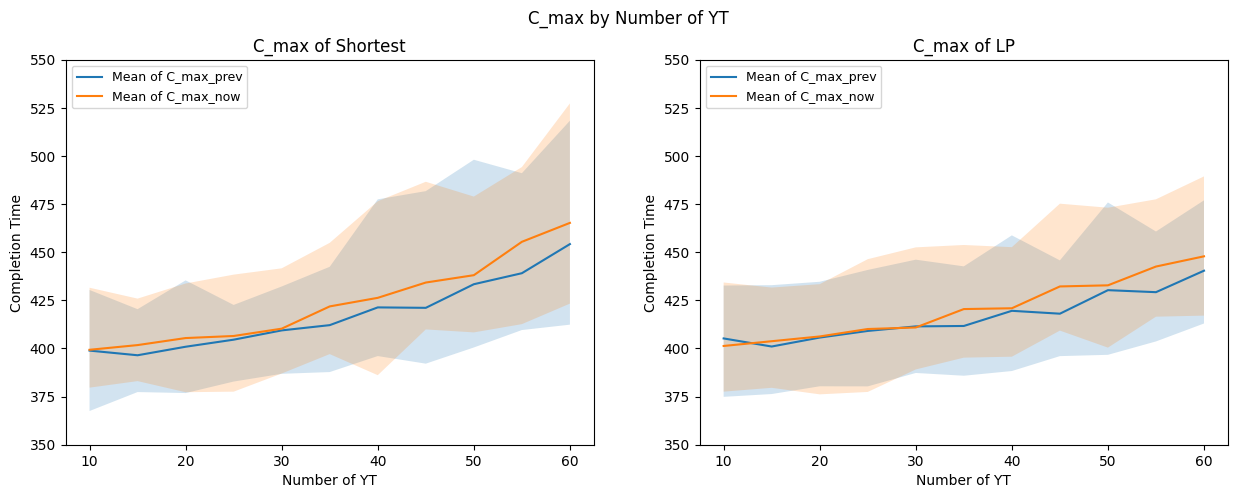

In [33]:
x_col = 'Number of YT'
y_col = ['C_max_prev', 'C_max_now']
y_lim = (350, 550)
fig_size = (15, 5)
title = 'C_max by Number of YT'
legend_loc = 'upper left'

lineplot_range_2(concat_df, x_col, y_col, y_lim, fig_size, title, legend_loc)

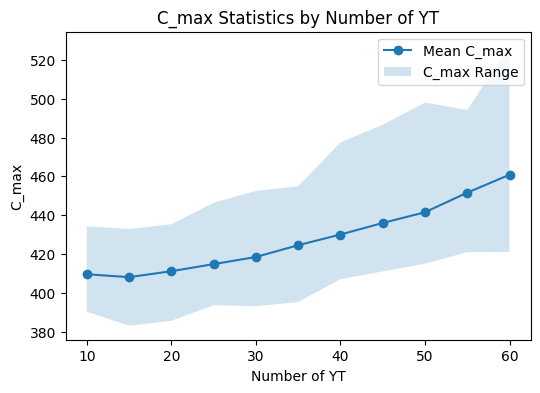

In [34]:
df = concat_df.copy()

# 'Number of YT'가 같은 행끼리의 C_max의 평균값
mean_c_max = df.groupby('Number of YT')['C_max'].mean()

# 'Number of YT'가 같은 행끼리의 C_max의 최대 및 최소값
max_c_max = df.groupby('Number of YT')['C_max'].max()
min_c_max = df.groupby('Number of YT')['C_max'].min()

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(mean_c_max.index, mean_c_max, label='Mean C_max', marker='o')
plt.fill_between(mean_c_max.index, min_c_max, max_c_max, alpha=0.2, label='C_max Range')

plt.title('C_max Statistics by Number of YT')
plt.xlabel('Number of YT')
plt.ylabel('C_max')
plt.legend()
plt.show()

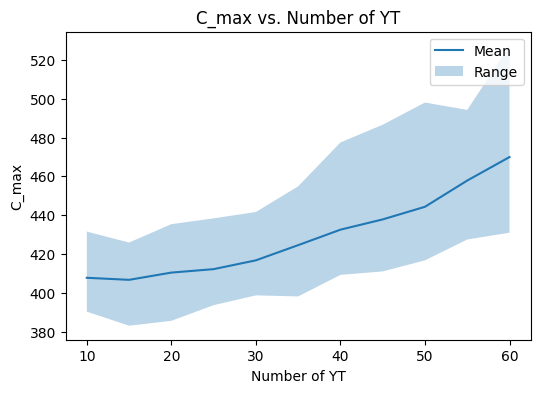

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df = concat_df.copy()

# 데이터프레임에서 alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]

# Number of YT 별로 C_max의 평균, 최소, 최대값 계산
grouped_data = filtered_data.groupby('Number of YT')['C_max'].agg(['mean', 'min', 'max']).reset_index()

# 그래프 그리기
plt.figure(figsize=(6, 4))

# 꺾은선 그래프
sns.lineplot(x='Number of YT', y='mean', data=grouped_data, label='Mean')

# 최대 최소값에 대한 그림자 처리
plt.fill_between(grouped_data['Number of YT'], grouped_data['min'], grouped_data['max'], alpha=0.3, label='Range')

# 그래프 제목 및 레이블 설정
plt.title('C_max vs. Number of YT')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


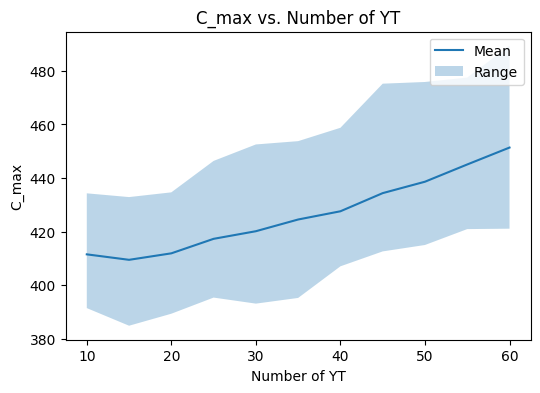

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df = concat_df.copy()

# 데이터프레임에서 alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# Number of YT 별로 C_max의 평균, 최소, 최대값 계산
grouped_data = filtered_data.groupby('Number of YT')['C_max'].agg(['mean', 'min', 'max']).reset_index()

# 그래프 그리기
plt.figure(figsize=(6, 4))

# 꺾은선 그래프
sns.lineplot(x='Number of YT', y='mean', data=grouped_data, label='Mean')

# 최대 최소값에 대한 그림자 처리
plt.fill_between(grouped_data['Number of YT'], grouped_data['min'], grouped_data['max'], alpha=0.3, label='Range')

# 그래프 제목 및 레이블 설정
plt.title('C_max vs. Number of YT')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


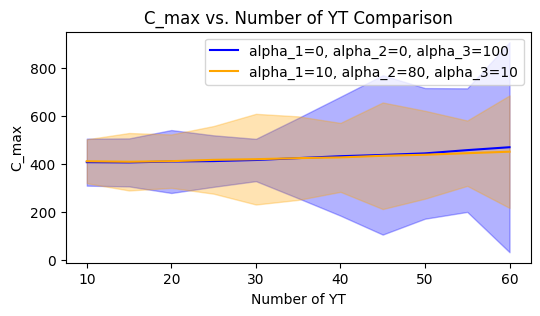

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns



# alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data_1 = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]

# alpha_1이 10, alpha_2가 80, alpha_3이 10인 행 추출
filtered_data_2 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# 각각의 데이터에 대해 Number of YT 별로 C_max의 평균과 variance 계산
grouped_data_1 = filtered_data_1.groupby('Number of YT')['C_max'].agg(['mean', 'var']).reset_index()
grouped_data_2 = filtered_data_2.groupby('Number of YT')['C_max'].agg(['mean', 'var']).reset_index()

# 그래프 그리기
plt.figure(figsize=(6,3))

# 꺾은선 그래프
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_1, label='alpha_1=0, alpha_2=0, alpha_3=100', color='blue')
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_2, label='alpha_1=10, alpha_2=80, alpha_3=10', color='orange')

# 값의 variance를 계산하여 그림자 처리
plt.fill_between(grouped_data_1['Number of YT'], grouped_data_1['mean'] - grouped_data_1['var'], grouped_data_1['mean'] + grouped_data_1['var'], alpha=0.3, color='blue')
plt.fill_between(grouped_data_2['Number of YT'], grouped_data_2['mean'] - grouped_data_2['var'], grouped_data_2['mean'] + grouped_data_2['var'], alpha=0.3, color='orange')

# 그래프 제목 및 레이블 설정
plt.title('C_max vs. Number of YT Comparison')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


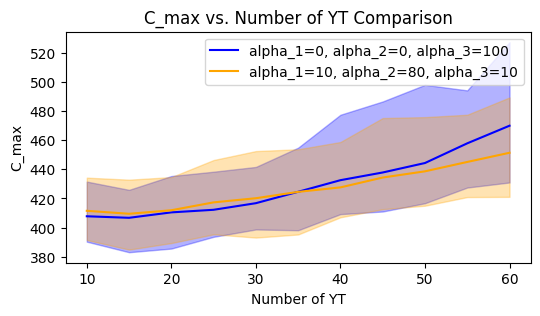

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data_1 = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]

# alpha_1이 10, alpha_2가 80, alpha_3이 10인 행 추출
filtered_data_2 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# 각각의 데이터에 대해 Number of YT 별로 C_max의 평균과 최대, 최소값 계산
grouped_data_1 = filtered_data_1.groupby('Number of YT')['C_max'].agg(['mean', 'min', 'max']).reset_index()
grouped_data_2 = filtered_data_2.groupby('Number of YT')['C_max'].agg(['mean', 'min', 'max']).reset_index()

# 그래프 그리기
plt.figure(figsize=(6, 3))

# 꺾은선 그래프
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_1, label='alpha_1=0, alpha_2=0, alpha_3=100', color='blue')
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_2, label='alpha_1=10, alpha_2=80, alpha_3=10', color='orange')

# 값의 최대, 최소값을 활용하여 그림자 처리
plt.fill_between(grouped_data_1['Number of YT'], grouped_data_1['min'], grouped_data_1['max'], alpha=0.3, color='blue')
plt.fill_between(grouped_data_2['Number of YT'], grouped_data_2['min'], grouped_data_2['max'], alpha=0.3, color='orange')

# 그래프 제목 및 레이블 설정
plt.title('C_max vs. Number of YT Comparison')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

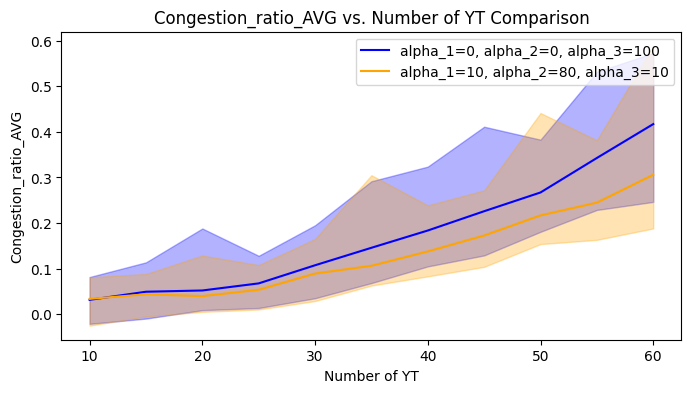

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data_1 = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]

# alpha_1이 10, alpha_2가 80, alpha_3이 10인 행 추출
filtered_data_2 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# 각각의 데이터에 대해 Number of YT 별로 Congestion_ratio_AVG의 평균과 최대, 최소값 계산
grouped_data_1 = filtered_data_1.groupby('Number of YT')['Congestion_ratio_AVG'].agg(['mean', 'min', 'max']).reset_index()
grouped_data_2 = filtered_data_2.groupby('Number of YT')['Congestion_ratio_AVG'].agg(['mean', 'min', 'max']).reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 4))

# 꺾은선 그래프
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_1, label='alpha_1=0, alpha_2=0, alpha_3=100', color='blue')
sns.lineplot(x='Number of YT', y='mean', data=grouped_data_2, label='alpha_1=10, alpha_2=80, alpha_3=10', color='orange')

# 값의 최대, 최소값을 활용하여 그림자 처리
plt.fill_between(grouped_data_1['Number of YT'], grouped_data_1['min'], grouped_data_1['max'], alpha=0.3, color='blue')
plt.fill_between(grouped_data_2['Number of YT'], grouped_data_2['min'], grouped_data_2['max'], alpha=0.3, color='orange')

# 그래프 제목 및 레이블 설정
plt.title('Congestion_ratio_AVG vs. Number of YT Comparison')
plt.xlabel('Number of YT')
plt.ylabel('Congestion_ratio_AVG')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()